Reading in and transforming data...

k = 1
Training time: 0:00:00
Train accuracy: 1.0
Time to compute train accuracy: 0:00:10.035709 Train size: 1000
Test accuracy: 0.869
Time to compute test accuracy: 0:00:14.507388 Test size: 1000

k = 2
Training time: 0:00:00
Train accuracy: 1.0
Time to compute train accuracy: 0:00:10.450663 Train size: 1000
Test accuracy: 0.869
Time to compute test accuracy: 0:00:15.830018 Test size: 1000

k = 3
Training time: 0:00:00
Train accuracy: 0.961
Time to compute train accuracy: 0:00:10.717904 Train size: 1000
Test accuracy: 0.869
Time to compute test accuracy: 0:00:15.993862 Test size: 1000

k = 4
Training time: 0:00:00
Train accuracy: 0.957
Time to compute train accuracy: 0:00:10.727896 Train size: 1000
Test accuracy: 0.871
Time to compute test accuracy: 0:00:17.392463 Test size: 1000

k = 5
Training time: 0:00:00
Train accuracy: 0.931
Time to compute train accuracy: 0:00:11.044930 Train size: 1000
Test accuracy: 0.863
Time to compute test accuracy: 0:00

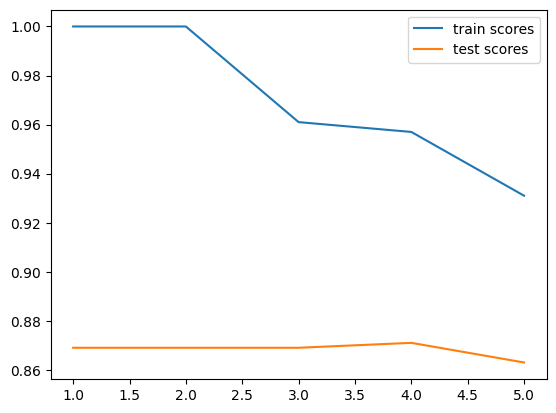

In [2]:
from __future__ import print_function, division
from future.utils import iteritems
from builtins import range, input

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sortedcontainers import SortedList
from datetime import datetime


def get_data(limit=None):
    print("Reading in and transforming data...")
    df = pd.read_csv('mnist_train_small.csv')
    data = df.values
    np.random.shuffle(data)
    X = data[:, 1:] / 255.0 
    Y = data[:, 0]
    if limit is not None:
        X, Y = X[:limit], Y[:limit]
    return X, Y

def get_xor():
    X = np.zeros((200, 2))
    X[:50] = np.random.random((50, 2)) / 2 + 0.5 
    X[50:100] = np.random.random((50, 2)) / 2 
    X[100:150] = np.random.random((50, 2)) / 2 + np.array([[0, 0.5]]) 
    X[150:] = np.random.random((50, 2)) / 2 + np.array([[0.5, 0]]) 
    Y = np.array([0]*100 + [1]*100)
    return X, Y

def get_donut():
    N = 200
    R_inner = 5
    R_outer = 10
    R1 = np.random.randn(N//2) + R_inner
    theta = 2*np.pi*np.random.random(N//2)
    X_inner = np.concatenate([[R1 * np.cos(theta)], [R1 * np.sin(theta)]]).T

    R2 = np.random.randn(N//2) + R_outer
    theta = 2*np.pi*np.random.random(N//2)
    X_outer = np.concatenate([[R2 * np.cos(theta)], [R2 * np.sin(theta)]]).T

    X = np.concatenate([ X_inner, X_outer ])
    Y = np.array([0]*(N//2) + [1]*(N//2))
    return X, Y

class KNN(object):
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X = X
        self.y = y

    def predict(self, X):
        y = np.zeros(len(X))
        for i,x in enumerate(X): 
            sl = SortedList() 
            for j,xt in enumerate(self.X): 
                diff = x - xt
                d = diff.dot(diff)
                if len(sl) < self.k:
                    sl.add( (d, self.y[j]) )
                else:
                    if d < sl[-1][0]:
                        del sl[-1]
                        sl.add( (d, self.y[j]) )

            votes = {}
            for _, v in sl:
                votes[v] = votes.get(v,0) + 1
            max_votes = 0
            max_votes_class = -1
            for v,count in iteritems(votes):
                if count > max_votes:
                    max_votes = count
                    max_votes_class = v
            y[i] = max_votes_class
        return y

    def score(self, X, Y):
        P = self.predict(X)
        return np.mean(P == Y)


if __name__ == '__main__':
    X, Y = get_data(2000)
    Ntrain = 1000
    Xtrain, Ytrain = X[:Ntrain], Y[:Ntrain]
    Xtest, Ytest = X[Ntrain:], Y[Ntrain:]
    train_scores = []
    test_scores = []
    ks = (1,2,3,4,5)
    for k in ks:
        print("\nk =", k)
        knn = KNN(k)
        t0 = datetime.now()
        knn.fit(Xtrain, Ytrain)
        print("Training time:", (datetime.now() - t0))

        t0 = datetime.now()
        train_score = knn.score(Xtrain, Ytrain)
        train_scores.append(train_score)
        print("Train accuracy:", train_score)
        print("Time to compute train accuracy:", (datetime.now() - t0), "Train size:", len(Ytrain))

        t0 = datetime.now()
        test_score = knn.score(Xtest, Ytest)
        print("Test accuracy:", test_score)
        test_scores.append(test_score)
        print("Time to compute test accuracy:", (datetime.now() - t0), "Test size:", len(Ytest))

    plt.plot(ks, train_scores, label='train scores')
    plt.plot(ks, test_scores, label='test scores')
    plt.legend()
    plt.show()